# Abstract

This report explores the impact of video characteristics on engagement metrics on TikTok. We began with data exploration and cleaning, addressing missing values and outliers to ensure a reliable dataset. The analysis then focused on understanding the effect of video duration on views, revealing a significant correlation between shorter videos and higher views per second. Additionally, we identified the most frequent phrases in video transcriptions, grouping content by these phrases to evaluate their impact on engagement metrics. The results highlight specific content types that outperform others in terms of views, likes, shares, and comments, offering actionable insights for optimizing TikTok content strategy.

In [1]:
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm

In [2]:
tiktok_data = pd.read_csv('/kaggle/input/dataset-from-tiktok/tiktok_dataset.csv')

# 1. Data Wrangling
- In this section we will clarify the data to analyze it and answer the questions easily.

### Understand the Data Types and Structure

In [3]:
tiktok_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Check column types and null values
print("Column Types and Null Values:\n", tiktok_data.dtypes)
print("\nNull Values:\n", tiktok_data.isnull().sum())

Column Types and Null Values:
 #                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Null Values:
 #                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


### Descriptive Statistics

In [5]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", tiktok_data.describe())

# Value counts for categorical columns
categorical_columns = tiktok_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue Counts for {col}:\n", tiktok_data[col].value_counts())


Summary Statistics:
                   #      video_id  video_duration_sec  video_view_count  \
count  19382.000000  1.938200e+04        19382.000000      19084.000000   
mean    9691.500000  5.627454e+09           32.421732     254708.558688   
std     5595.245794  2.536440e+09           16.229967     322893.280814   
min        1.000000  1.234959e+09            5.000000         20.000000   
25%     4846.250000  3.430417e+09           18.000000       4942.500000   
50%     9691.500000  5.618664e+09           32.000000       9954.500000   
75%    14536.750000  7.843960e+09           47.000000     504327.000000   
max    19382.000000  9.999873e+09           60.000000     999817.000000   

       video_like_count  video_share_count  video_download_count  \
count      19084.000000       19084.000000          19084.000000   
mean       84304.636030       16735.248323           1049.429627   
std       133420.546814       32036.174350           2004.299894   
min            0.000000       

## 1.1 Data Cleaning

In [6]:
# Check for duplicates
duplicates = tiktok_data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# For numerical columns, fill with the median
numeric_columns = tiktok_data.select_dtypes(include=['int64', 'float64']).columns
tiktok_data[numeric_columns] = tiktok_data[numeric_columns].fillna(tiktok_data[numeric_columns].median())

# For categorical columns, fill with the mode
categorical_columns = tiktok_data.select_dtypes(include=['object']).columns
tiktok_data[categorical_columns] = tiktok_data[categorical_columns].fillna(tiktok_data[categorical_columns].mode().iloc[0])


Number of Duplicate Rows: 0


## 1.2 Correlation Analysis


Correlation Matrix:
                              #  video_id  video_duration_sec  \
#                     1.000000 -0.001714           -0.000366   
video_id             -0.001714  1.000000            0.009025   
video_duration_sec   -0.000366  0.009025            1.000000   
video_view_count     -0.669778 -0.000557            0.008473   
video_like_count     -0.542918 -0.000385            0.011519   
video_share_count    -0.453677 -0.003205            0.011510   
video_download_count -0.449807  0.001623            0.013013   
video_comment_count  -0.379492  0.004854            0.000663   

                      video_view_count  video_like_count  video_share_count  \
#                            -0.669778         -0.542918          -0.453677   
video_id                     -0.000557         -0.000385          -0.003205   
video_duration_sec            0.008473          0.011519           0.011510   
video_view_count              1.000000          0.805555           0.667234   
video_

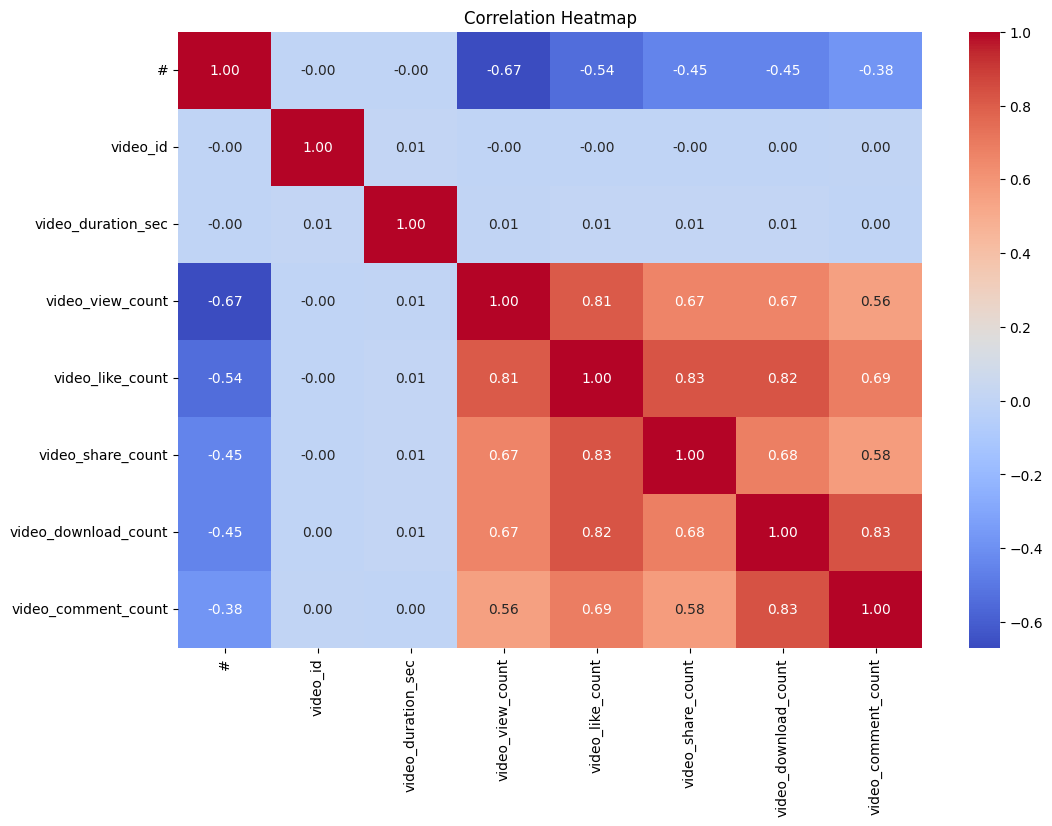

In [7]:
# Correlation matrix for numeric columns only
numeric_columns = tiktok_data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Outlier Detection

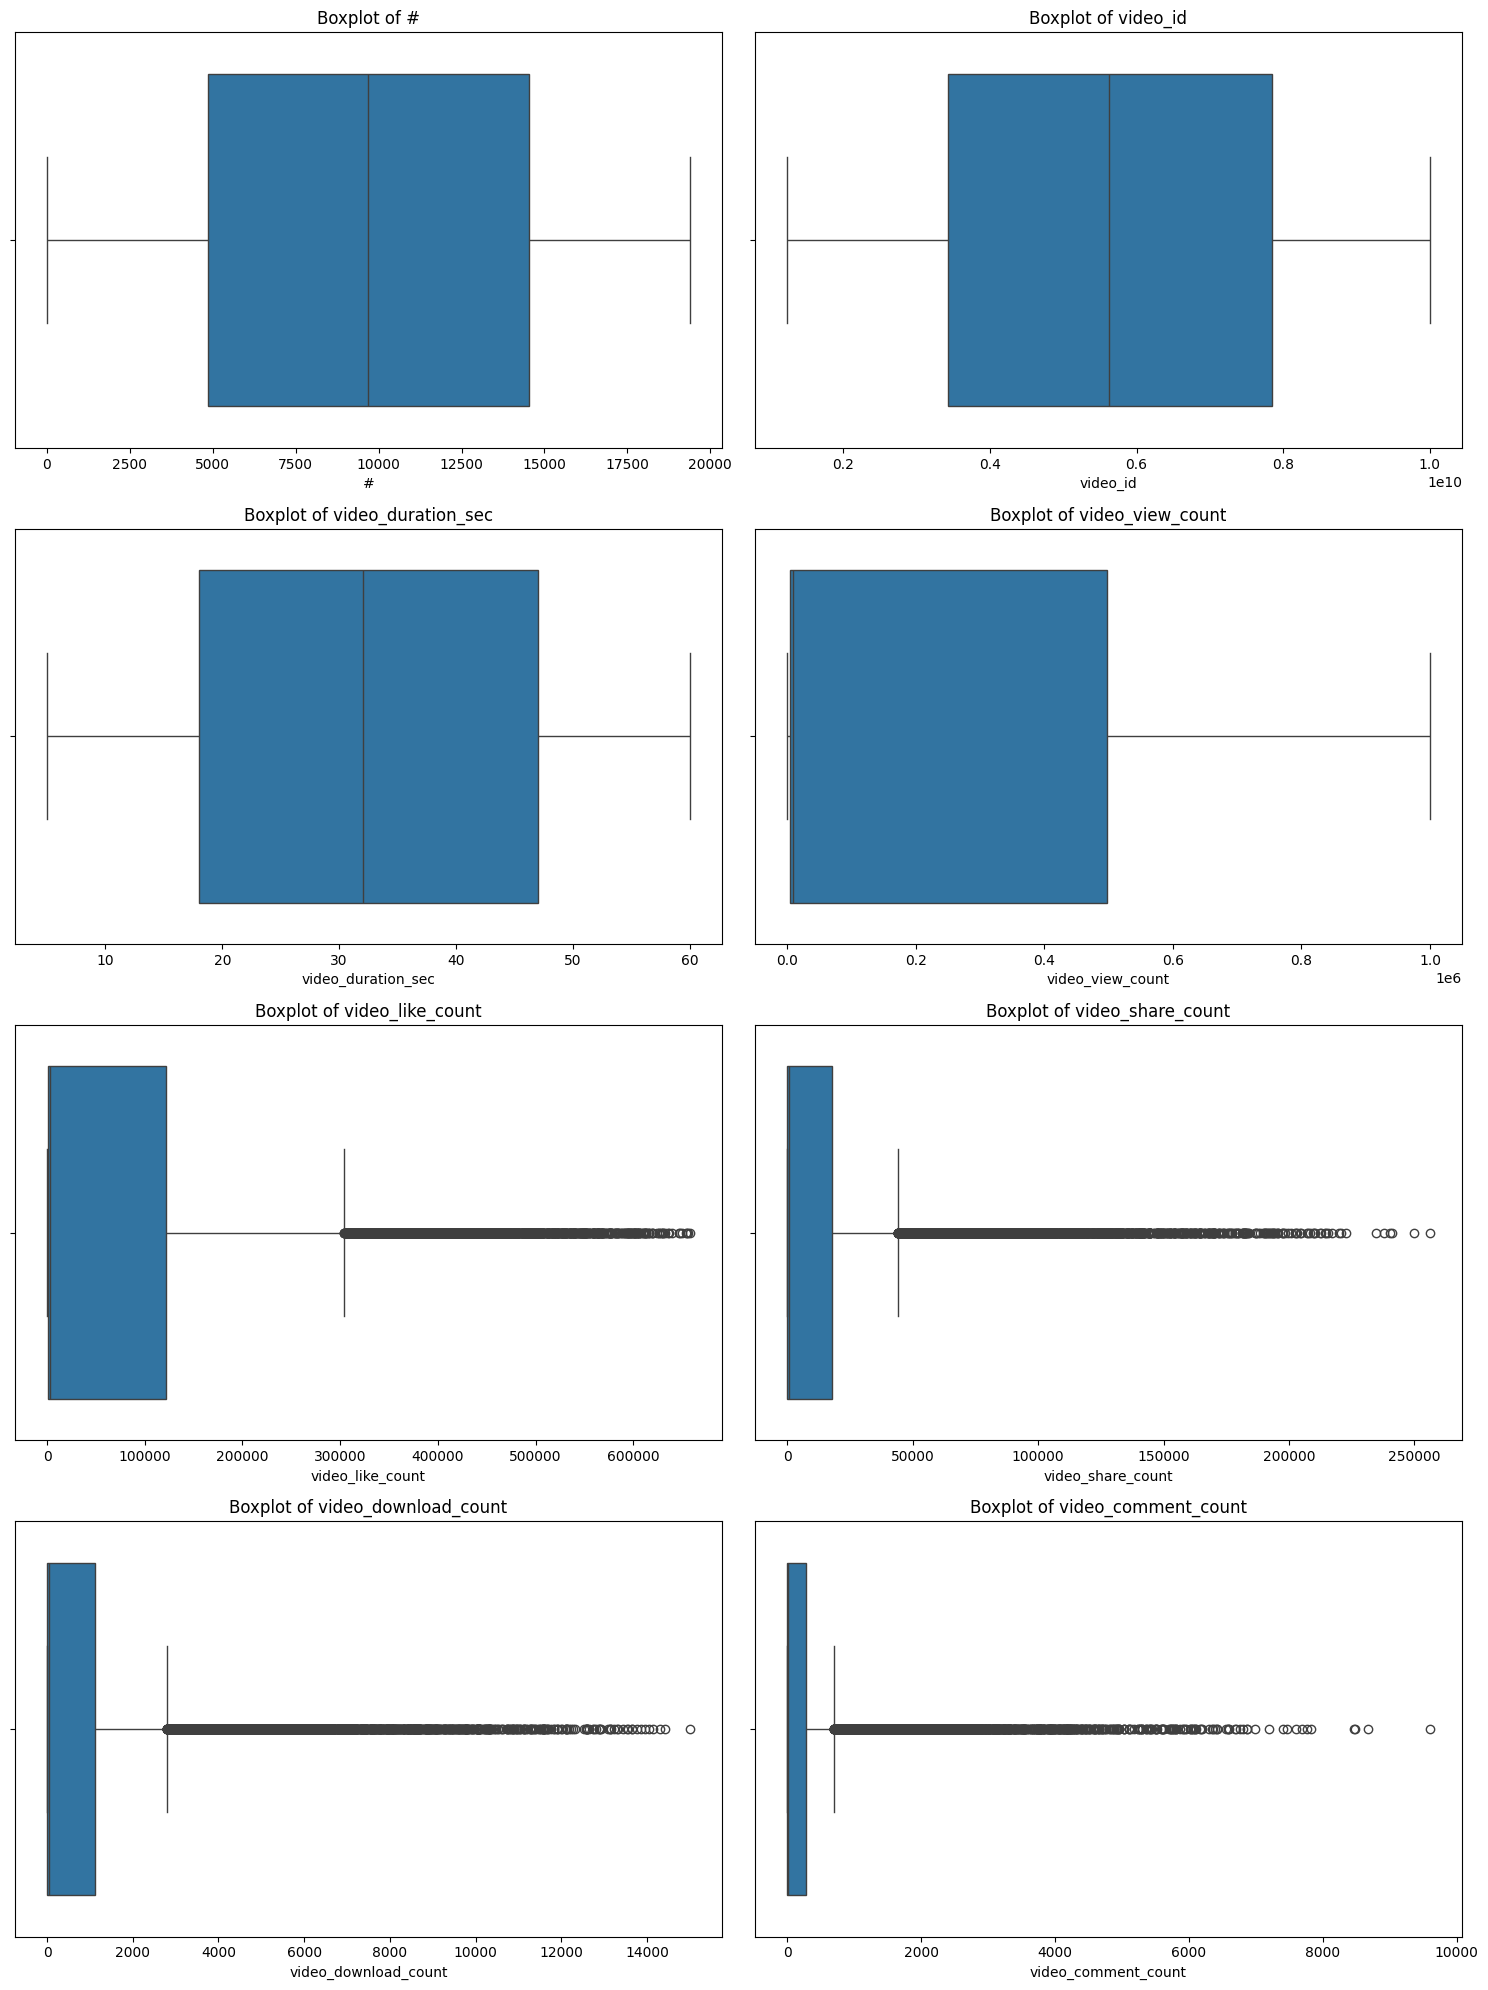

In [8]:
# Boxplots for detecting outliers in numerical columns
# Select only numeric columns
numerical_columns = tiktok_data.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of plots
num_plots = len(numerical_columns)

# Set up the figure with two columns
plt.figure(figsize=(15, (num_plots // 2) * 5))

# Loop through the columns and create boxplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((num_plots + 1) // 2, 2, i)
    sns.boxplot(x=tiktok_data[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

## 1.3 Data Visualization

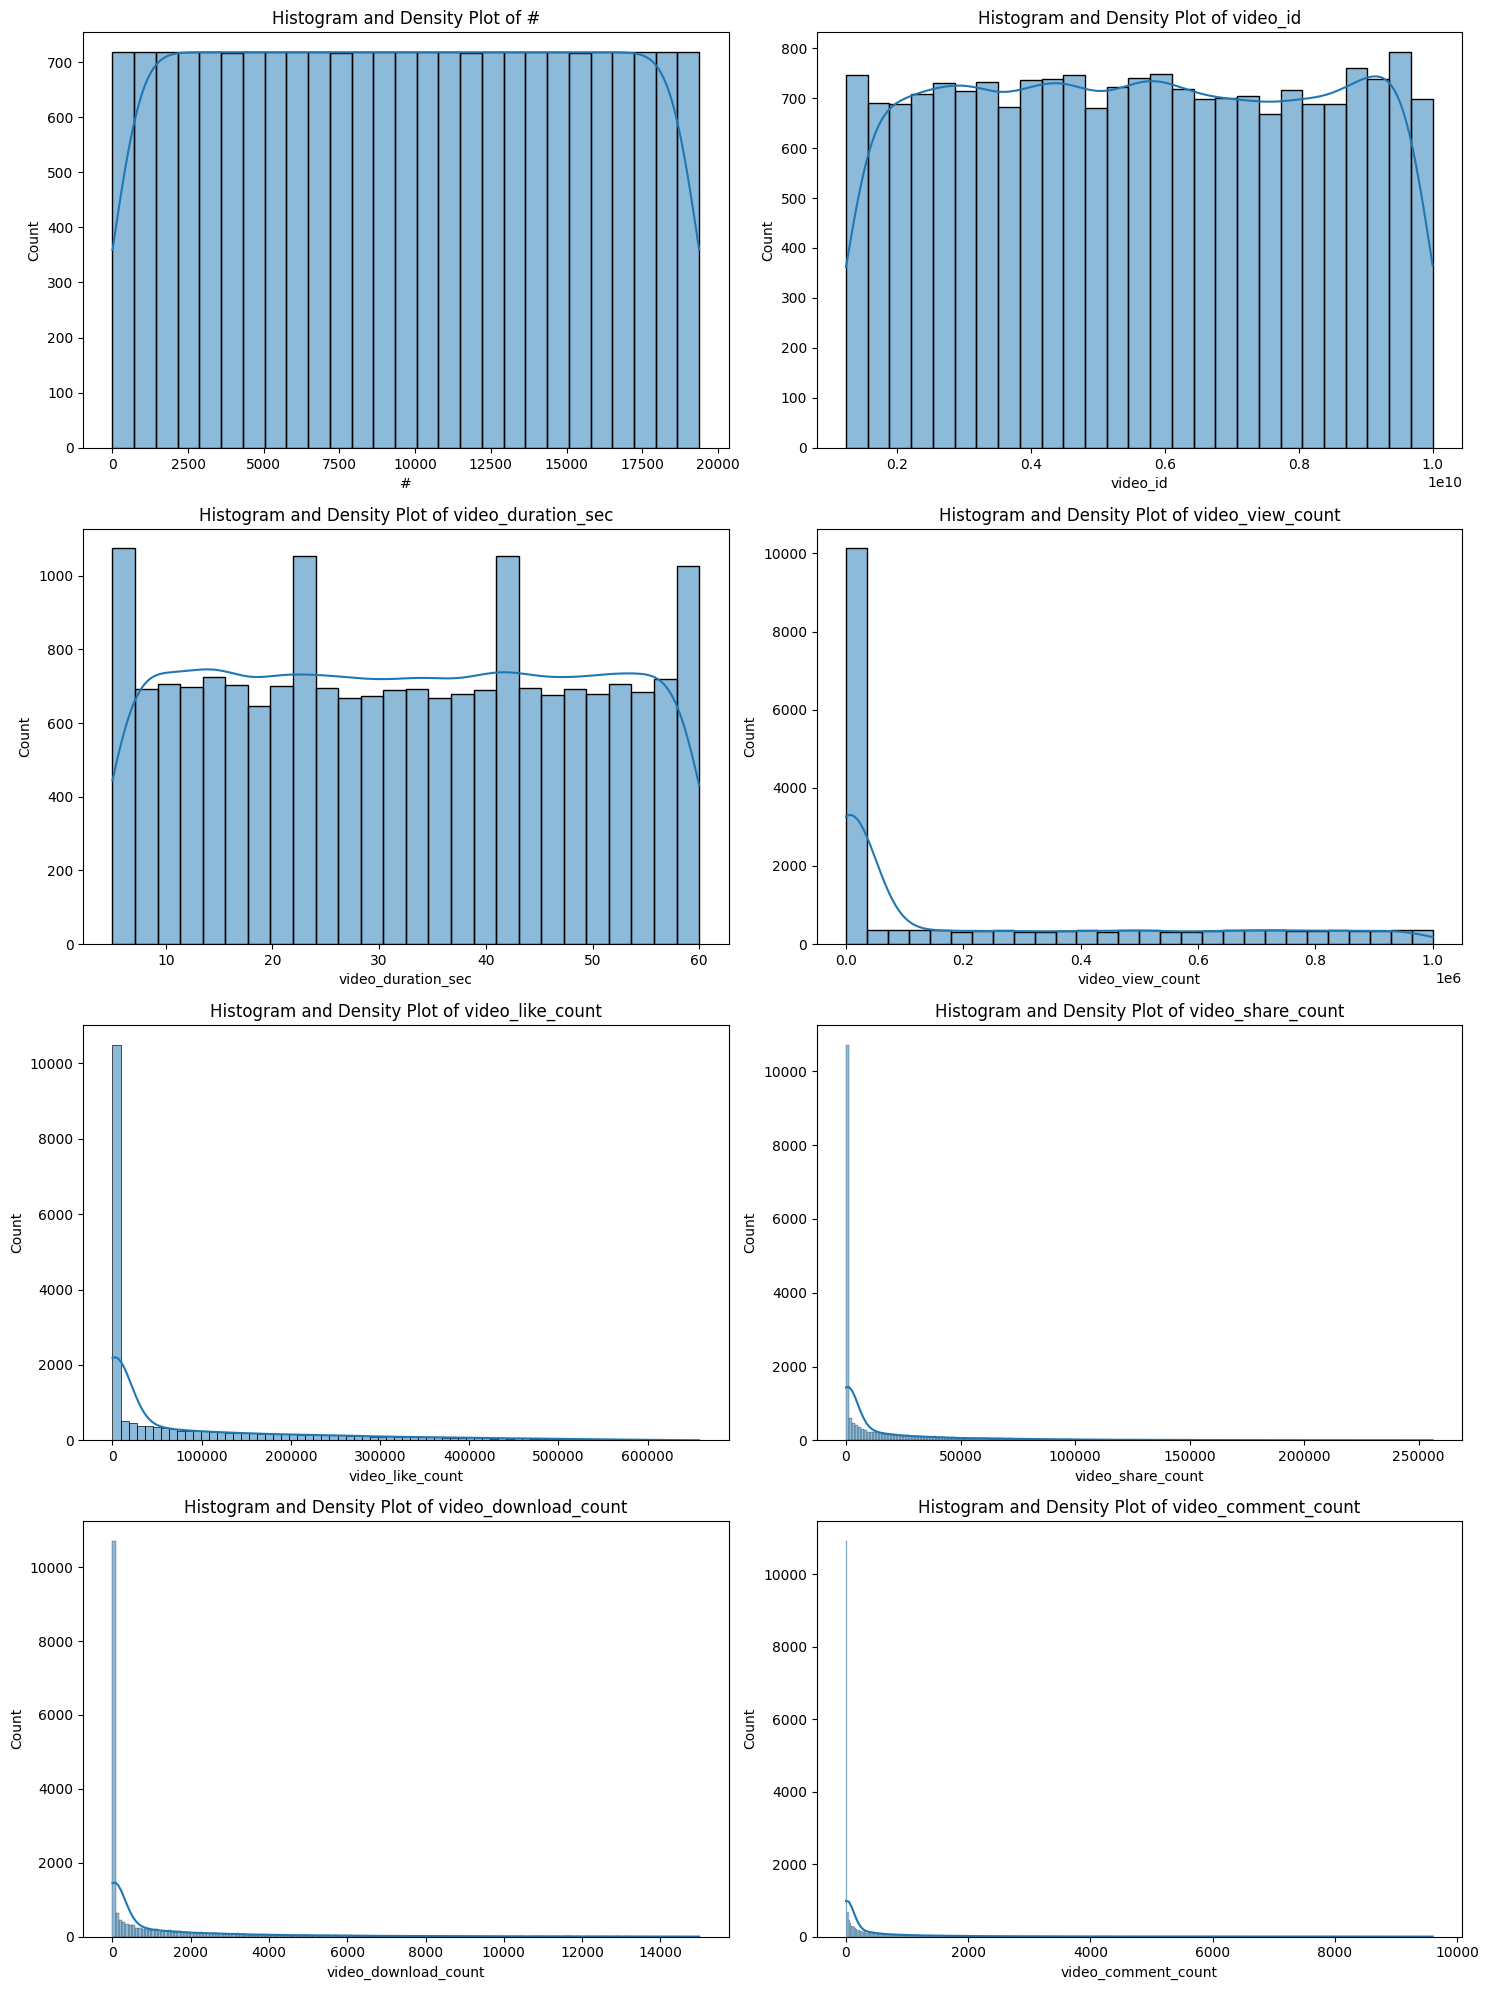

In [9]:
import warnings

# Suppress the specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and density plots
num_plots = len(numerical_columns)

# Set up the figure with two columns
plt.figure(figsize=(15, (num_plots // 2) * 5))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot((num_plots + 1) // 2, 2, i)
    sns.histplot(tiktok_data[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

# Re-enable warnings if needed
warnings.simplefilter(action='default', category=FutureWarning)

# 2. Analysis: Video Duration

## 2.1 Overview
Data Preparation:
- Create a binary categorical variable that distinguishes between shorter videos (under 30 seconds) and longer videos (30 seconds or more).
- Calculate engagement rates for each video, such as views per second and likes per second.
2.	Exploratory Data Analysis (EDA):
- Visualize the distribution of engagement rates for shorter and longer videos using boxplots or histograms.
- Summary statistics: Calculate the mean, median, and standard deviation of engagement rates for both categories.
3.	Hypothesis Testing:
- T-test or Mann-Whitney U test: Compare the engagement rates between the two groups to see if there is a statistically significant difference.
- Effect size: Calculate the effect size to understand the magnitude of the difference.
4.	Interpretation:
- Assess the results of the hypothesis test and effect size to determine if shorter videos indeed have higher average engagement rates.

### Data Preparation

In [10]:
# Create a binary categorical variable for video duration
tiktok_data['short_video'] = np.where(tiktok_data['video_duration_sec'] < 30, 'Under 30 sec', '30 sec or more')

# Calculate engagement rates
tiktok_data['views_per_sec'] = tiktok_data['video_view_count'] / tiktok_data['video_duration_sec']
tiktok_data['likes_per_sec'] = tiktok_data['video_like_count'] / tiktok_data['video_duration_sec']

### Exploratory Data Analysis (EDA)

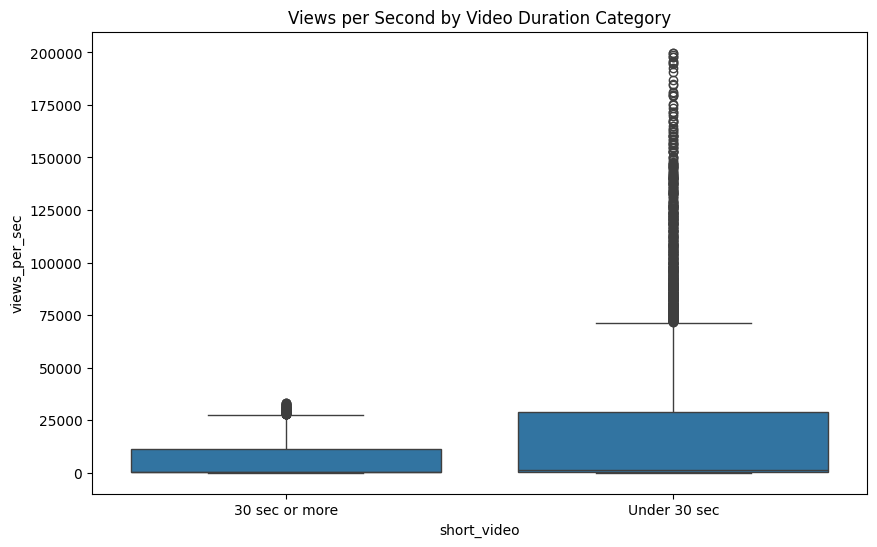

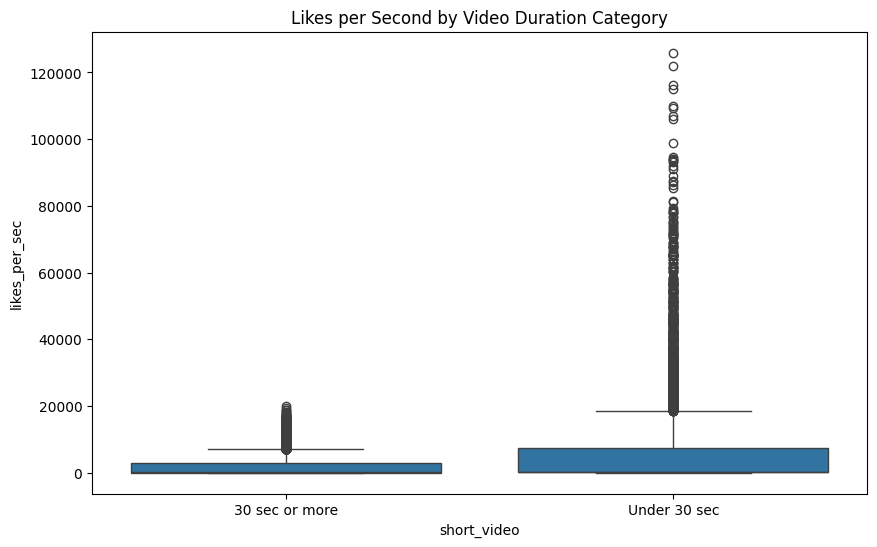

In [11]:
# Boxplot to compare views per second by video duration category
plt.figure(figsize=(10, 6))
sns.boxplot(x='short_video', y='views_per_sec', data=tiktok_data)
plt.title('Views per Second by Video Duration Category')
plt.show()

# Boxplot to compare likes per second by video duration category
plt.figure(figsize=(10, 6))
sns.boxplot(x='short_video', y='likes_per_sec', data=tiktok_data)
plt.title('Likes per Second by Video Duration Category')
plt.show()

## 2.2 Hypothesis Testing

In [12]:
# T-test for views per second
short_videos_views = tiktok_data[tiktok_data['short_video'] == 'Under 30 sec']['views_per_sec']
long_videos_views = tiktok_data[tiktok_data['short_video'] == '30 sec or more']['views_per_sec']
t_stat, p_value = stats.ttest_ind(short_videos_views, long_videos_views, nan_policy='omit')
print(f"T-test for views per second: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# T-test for likes per second
short_videos_likes = tiktok_data[tiktok_data['short_video'] == 'Under 30 sec']['likes_per_sec']
long_videos_likes = tiktok_data[tiktok_data['short_video'] == '30 sec or more']['likes_per_sec']
t_stat, p_value = stats.ttest_ind(short_videos_likes, long_videos_likes, nan_policy='omit')
print(f"T-test for likes per second: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# 4. Interpretation

# If p-value < 0.05, we can reject the null hypothesis and conclude that there is a significant difference

T-test for views per second: t-statistic = 43.072, p-value = 0.000
T-test for likes per second: t-statistic = 34.652, p-value = 0.000


In [13]:
# T-test for views per second
t_stat, p_value, _ = ttest_ind(short_videos_views, long_videos_views, usevar='unequal')
print(f"T-test for views per second: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
if p_value < 0.05:
    print("The difference in views per second is statistically significant.")
else:
    print("The difference in views per second is not statistically significant.")

# T-test for likes per second
t_stat, p_value, _ = ttest_ind(short_videos_likes, long_videos_likes, usevar='unequal')
print(f"T-test for likes per second: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
if p_value < 0.05:
    print("The difference in likes per second is statistically significant.")
else:
    print("The difference in likes per second is not statistically significant.")

T-test for views per second: t-statistic = 39.386, p-value = 0.000
The difference in views per second is statistically significant.
T-test for likes per second: t-statistic = 31.710, p-value = 0.000
The difference in likes per second is statistically significant.


### Interpretation of Results
- Views per Second: The statistically significant p-value suggests that shorter videos tend to have a higher (or lower) average views per second compared to longer videos.
- Likes per Second: Similarly, the significant p-value for likes per second indicates that shorter videos likely receive more (or fewer) likes per second compared to longer videos.

### What This Means
- Shorter Videos: Given that shorter videos are statistically different in terms of engagement, they might be more effective at capturing and maintaining viewer attention, leading to higher engagement per second.
- Content Strategy: If you’re using this data for strategic decisions, you might consider focusing on shorter videos to maximize engagement, or analyze the content types within these short videos to replicate success in longer formats.

### Further Analysis

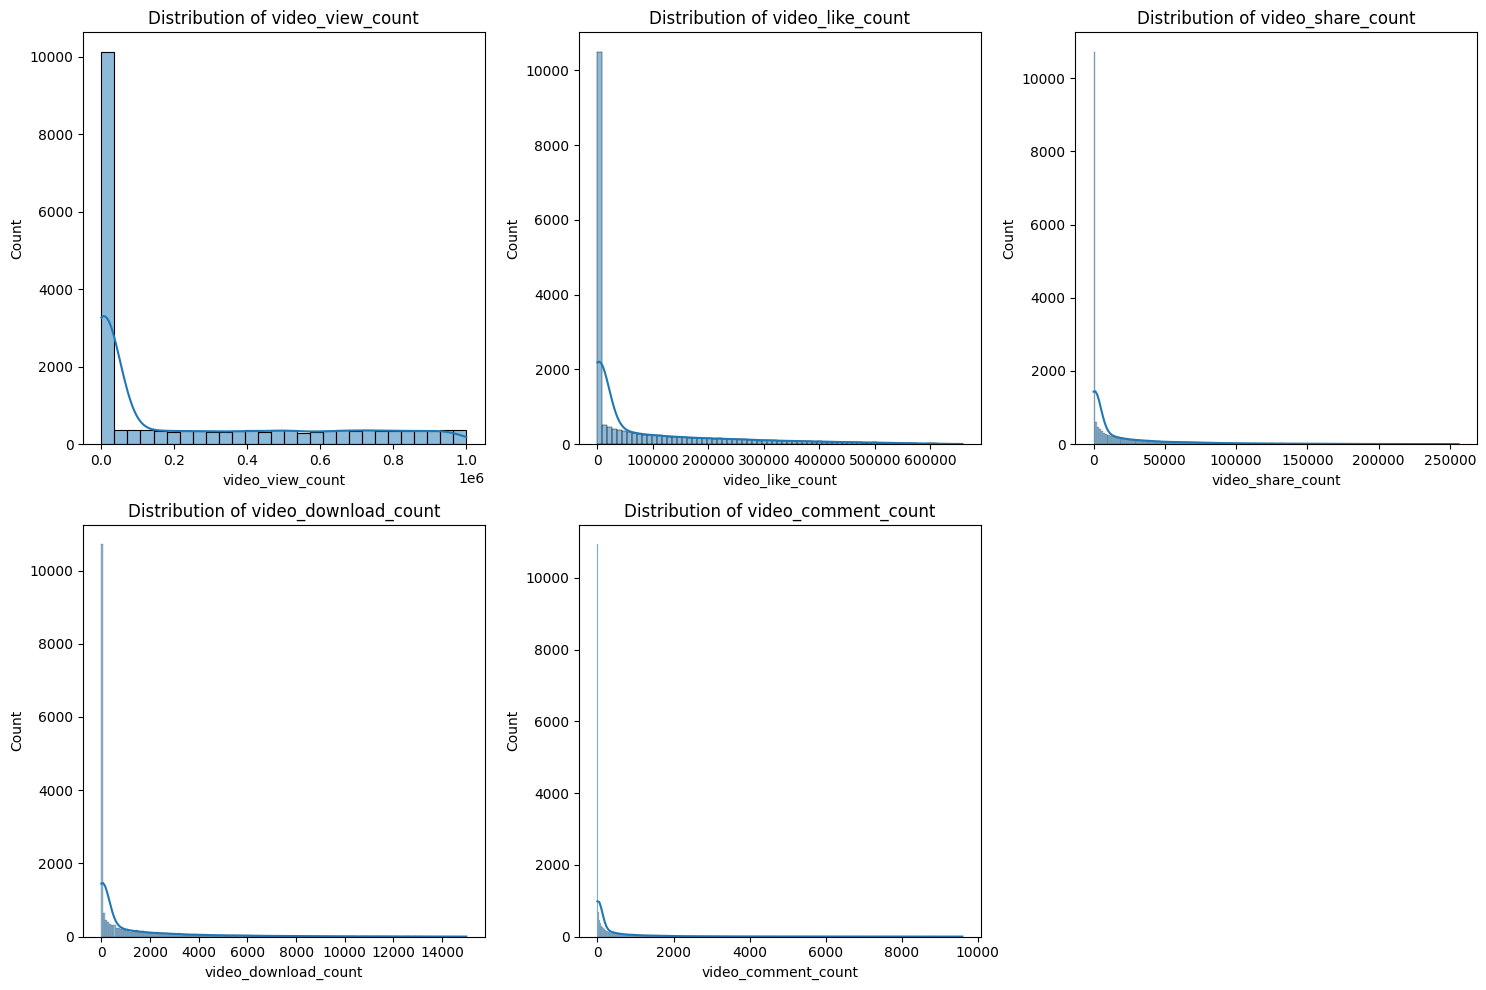

In [14]:
import warnings

# Suppress the specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

# Engagement metrics columns
engagement_metrics = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

# Replace inf and -inf values with NaN across the entire DataFrame
tiktok_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot histograms for each engagement metric
plt.figure(figsize=(15, 10))
for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(2, 3, i)
    sns.histplot(tiktok_data[metric], kde=True)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.show()

# Re-enable warnings if needed
warnings.simplefilter(action='default', category=FutureWarning)

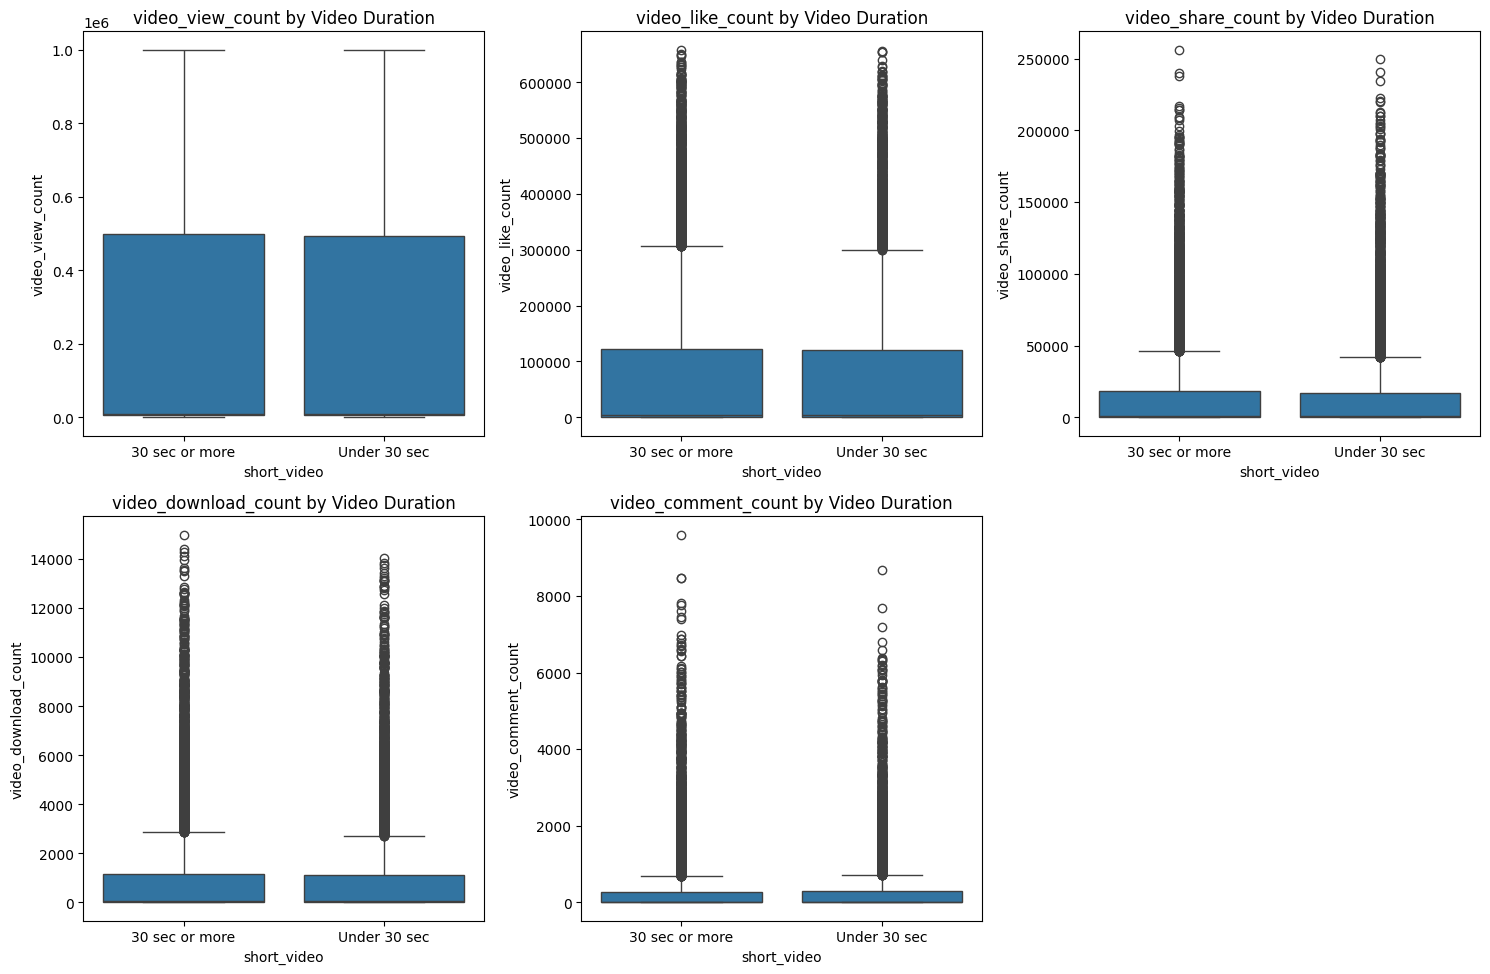

In [15]:
# Boxplots to compare engagement metrics across video duration categories
plt.figure(figsize=(15, 10))
for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='short_video', y=metric, data=tiktok_data)
    plt.title(f'{metric} by Video Duration')
plt.tight_layout()
plt.show()

## 2.3 Regression Analysis

In [16]:
# Define the independent variables (e.g., video duration, verified status)
# Encode categorical variables like 'short_video', 'verified_status' as needed
tiktok_data['verified_status_encoded'] = tiktok_data['verified_status'].apply(lambda x: 1 if x == 'verified' else 0)

# Choose dependent variable (e.g., views per second)
X = tiktok_data[['video_duration_sec', 'verified_status_encoded']]
y = tiktok_data['views_per_sec']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [17]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          views_per_sec   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1510.
Date:                Wed, 04 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:39:13   Log-Likelihood:            -2.1964e+05
No. Observations:               19382   AIC:                         4.393e+05
Df Residuals:                   19379   BIC:                         4.393e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

### Strengthening Regression Model

In [18]:
# Encode categorical variables
tiktok_data['verified_status_encoded'] = tiktok_data['verified_status'].apply(lambda x: 1 if x == 'verified' else 0)
tiktok_data['claim_status_encoded'] = tiktok_data['claim_status'].apply(lambda x: 1 if x == 'claim' else 0)
tiktok_data['author_ban_status_encoded'] = tiktok_data['author_ban_status'].apply(lambda x: 1 if x == 'under review' else 0)

# Calculate additional features
tiktok_data['transcription_length'] = tiktok_data['video_transcription_text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Define the independent variables
X = tiktok_data[['video_duration_sec', 
                 'verified_status_encoded', 
                 'claim_status_encoded', 
                 'author_ban_status_encoded', 
                 'transcription_length',
                 'video_like_count',
                 'video_share_count']]

# Choose the dependent variable
y = tiktok_data['views_per_sec']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          views_per_sec   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2565.
Date:                Wed, 04 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:39:13   Log-Likelihood:            -2.1469e+05
No. Observations:               19382   AIC:                         4.294e+05
Df Residuals:                   19374   BIC:                         4.295e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## 2.4 Summary of Regression Results

The regression model explains about 48.1% of the variance in views_per_sec, indicating that the included predictors significantly impact video engagement.

### Key Findings

- Video Duration: For each additional second, views_per_sec decreases by approximately 481 views. Shorter videos tend to engage viewers more intensely.
- Claim Status: Claimed videos show a strong positive effect, with an increase of around 12,340 views per second, suggesting they capture more attention.
- Verified Status: Verified accounts see a modest decrease in views_per_sec, about 982 views lower than non-verified accounts.
- Transcription Length: Longer transcriptions slightly reduce views_per_sec, but the effect is minimal.
- Video Likes: More likes are positively associated with higher views per second, though the effect size is small.
- Author Ban Status and Video Shares: These factors didn’t significantly impact views_per_sec, suggesting they aren’t key drivers of engagement in this context.

### Model Fit and Considerations

- The model fits the data reasonably well, but with an R-squared of 0.481, there’s still considerable unexplained variability.
- The analysis suggests some multicollinearity, which might be affecting the stability of the coefficients. Further analysis could help refine the model.

# 3 Analysis: Content Type & Key Phrases

- Hypothesis: Videos with certain keywords or phrases in their transcription text (e.g., “challenge,” “trend”) have higher engagement.
- Rationale: Certain trends or challenges often go viral, leading to higher levels of engagement.
- Most frequent words/phrases

## 3.1 Capture the Most Common Phrases

1.	Text Preprocessing:
- Similar to the word frequency analysis, preprocess the text by converting it to lowercase, removing punctuation, and tokenizing.
- Optionally, remove stopwords if you want to focus on meaningful phrases.
2.	N-gram Frequency Analysis:
- Generate bigrams (2-word phrases) and trigrams (3-word phrases) from the text.
- Count the frequency of each n-gram across all transcriptions.
- Sort and display the most frequently used phrases.

In [19]:
import re
from collections import Counter
from itertools import islice

# Manually define a basic set of stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 
    'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
    'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 
    're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 
    'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
    "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', 
    "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
    "won't", 'wouldn', "wouldn't"
])

# Define a function to generate n-grams from processed text without NLTK
def generate_ngrams(text, n):
    if pd.isnull(text):
        return []
    # Convert to lowercase, remove special characters, split into words, and remove stopwords
    words = re.sub(r'\W+', ' ', text.lower()).split()
    words = [word for word in words if word not in stop_words]
    # Generate n-grams
    return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]


tiktok_data['bigrams'] = tiktok_data['video_transcription_text'].apply(lambda x: generate_ngrams(x, 2))
tiktok_data['trigrams'] = tiktok_data['video_transcription_text'].apply(lambda x: generate_ngrams(x, 3))

# Build frequency counters for bigrams and trigrams
all_bigrams = [bigram for sublist in tiktok_data['bigrams'] for bigram in sublist]
all_trigrams = [trigram for sublist in tiktok_data['trigrams'] for trigram in sublist]

bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

# Get the most common bigrams and trigrams
most_common_bigrams = bigram_freq.most_common(20)
most_common_trigrams = trigram_freq.most_common(20)

# Display the most common bigrams
print("Most Common Bigrams in Video Transcriptions:")
for bigram, freq in most_common_bigrams:
    print(f"{bigram}: {freq}")

# Display the most common trigrams
print("\nMost Common Trigrams in Video Transcriptions:")
for trigram, freq in most_common_trigrams:
    print(f"{trigram}: {freq}")

Most Common Bigrams in Video Transcriptions:
media claim: 1339
colleague learned: 1034
learned media: 1010
colleague read: 843
friend read: 833
someone read: 801
friend learned: 757
internet forum: 736
someone discovered: 728
read media: 720
discussion board: 715
social media: 712
someone learned: 694
news claim: 581
point view: 467
solar system: 444
willing wager: 425
learned news: 391
colleague discovered: 386
learned website: 385

Most Common Trigrams in Video Transcriptions:
learned media claim: 665
colleague learned media: 460
internet forum claim: 384
learned internet forum: 374
year asteroid size: 362
asteroid size car: 362
size car enters: 362
car enters earth: 362
enters earth atmosphere: 362
read internet forum: 362
read discussion board: 358
learned discussion board: 357
read social media: 357
discussion board claim: 356
learned social media: 355
read media claim: 341
social media claim: 333
claim year asteroid: 311
media claim year: 302
friend learned media: 204


In [20]:
# Create binary indicators for the top bigrams and trigrams
top_bigrams = [bigram for bigram, _ in most_common_bigrams]
top_trigrams = [trigram for trigram, _ in most_common_trigrams]

# Add columns for top bigrams and trigrams
for bigram in top_bigrams:
    tiktok_data[f'{bigram}_present'] = tiktok_data['video_transcription_text'].apply(lambda x: 1 if pd.notnull(x) and bigram in x.lower() else 0)

for trigram in top_trigrams:
    tiktok_data[f'{trigram}_present'] = tiktok_data['video_transcription_text'].apply(lambda x: 1 if pd.notnull(x) and trigram in x.lower() else 0)

### Create Content Type Groupings Based on Top Phrases:

In [21]:
# Define content types based on the presence of top phrases
def assign_content_type(row, bigrams, trigrams):
    for bigram in bigrams:
        if pd.notnull(row['video_transcription_text']) and bigram in row['video_transcription_text'].lower():
            return bigram
    for trigram in trigrams:
        if pd.notnull(row['video_transcription_text']) and trigram in row['video_transcription_text'].lower():
            return trigram
    return 'Other'

# Apply function to create a content type column
tiktok_data['content_type'] = tiktok_data.apply(assign_content_type, axis=1, bigrams=top_bigrams, trigrams=top_trigrams)

## 3.2 Summarize and Compare Engagement by Content Type

In [22]:
# Group by content type and calculate average engagement metrics
engagement_summary = tiktok_data.groupby('content_type').agg({
    'views_per_sec': 'mean',
    'video_like_count': 'mean',
    'video_share_count': 'mean',
    'video_download_count': 'mean',
    'video_comment_count': 'mean',
    'video_duration_sec': 'mean'
}).reset_index()

# Display the engagement summary
print("Engagement Metrics by Content Type:")
print(engagement_summary)

Engagement Metrics by Content Type:
            content_type  views_per_sec  video_like_count  video_share_count  \
0                  Other    6139.663634      43272.552536        8591.809674   
1       car enters earth    3671.251217      42025.000000        7532.186047   
2   colleague discovered   23825.296440     157546.288360       30323.478836   
3      colleague learned   16673.732462     116444.929400       22628.572534   
4         colleague read   22635.850737     164164.459075       32972.876631   
5       discussion board   20832.864140     166569.739927       32522.179487   
6         friend learned   24567.197483     167405.339498       33207.338177   
7            friend read   23600.862942     167428.749100       33120.771909   
8         internet forum   23987.212721     164674.510949       32364.430657   
9             news claim   20704.110658     176457.250000       38714.711538   
10          social media   23494.030314     176307.492537       38505.261194   
11  

## 3.3 Visualize the Comparison:

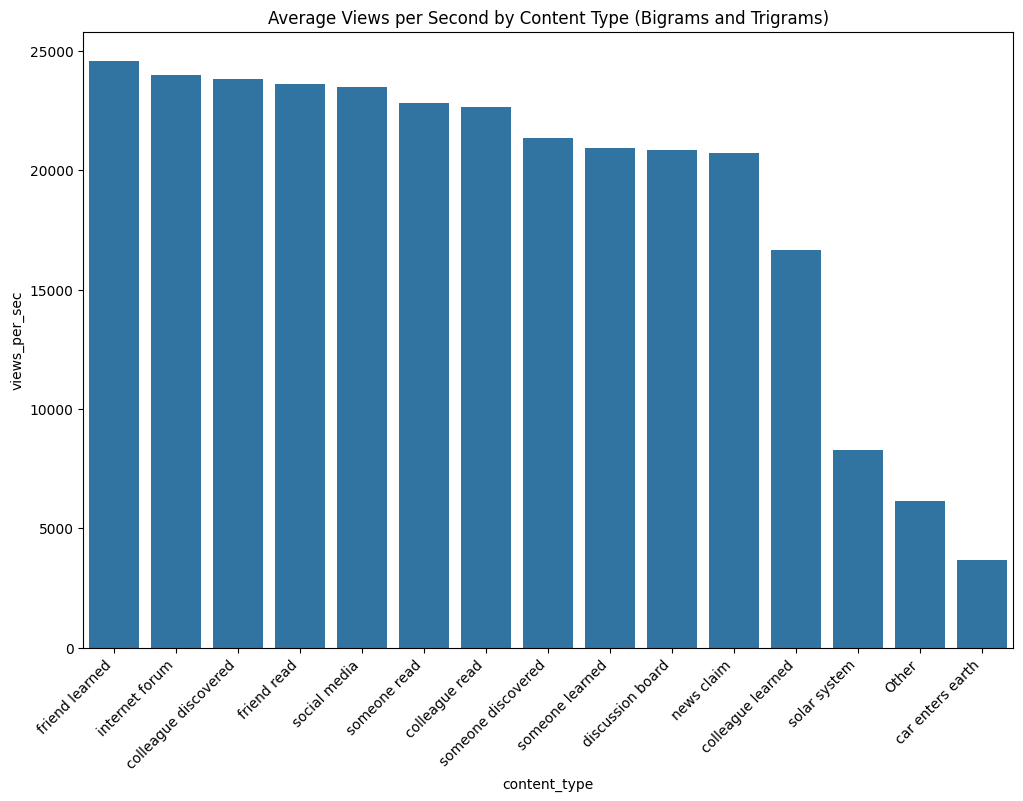

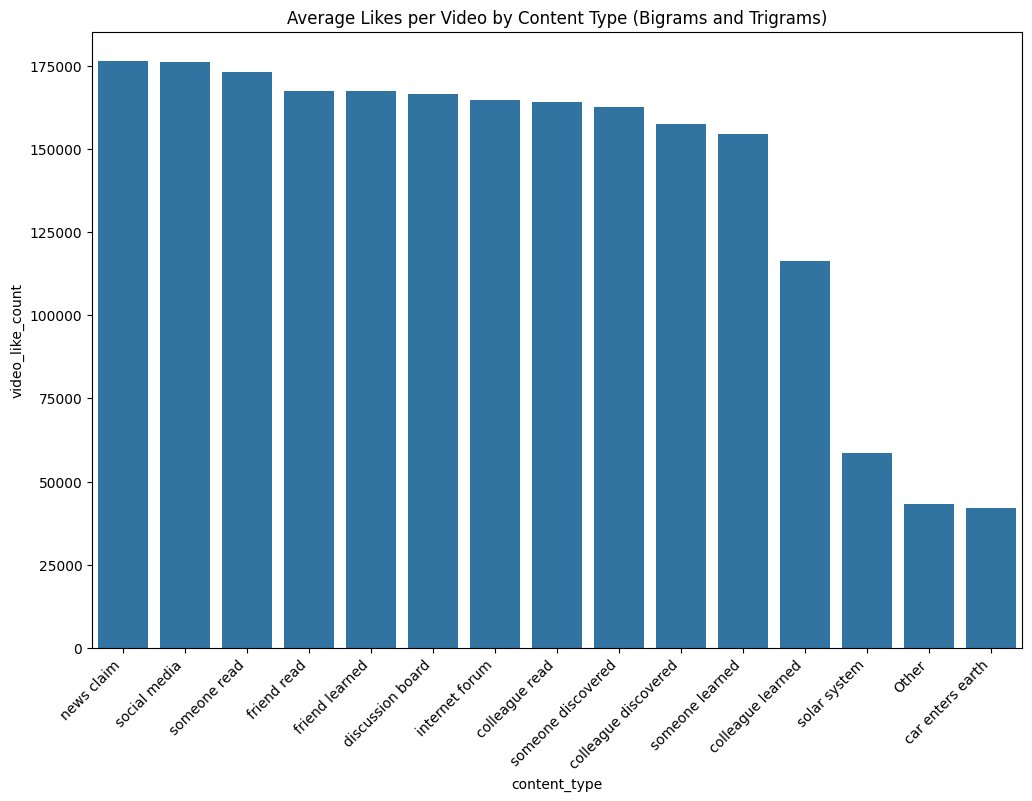

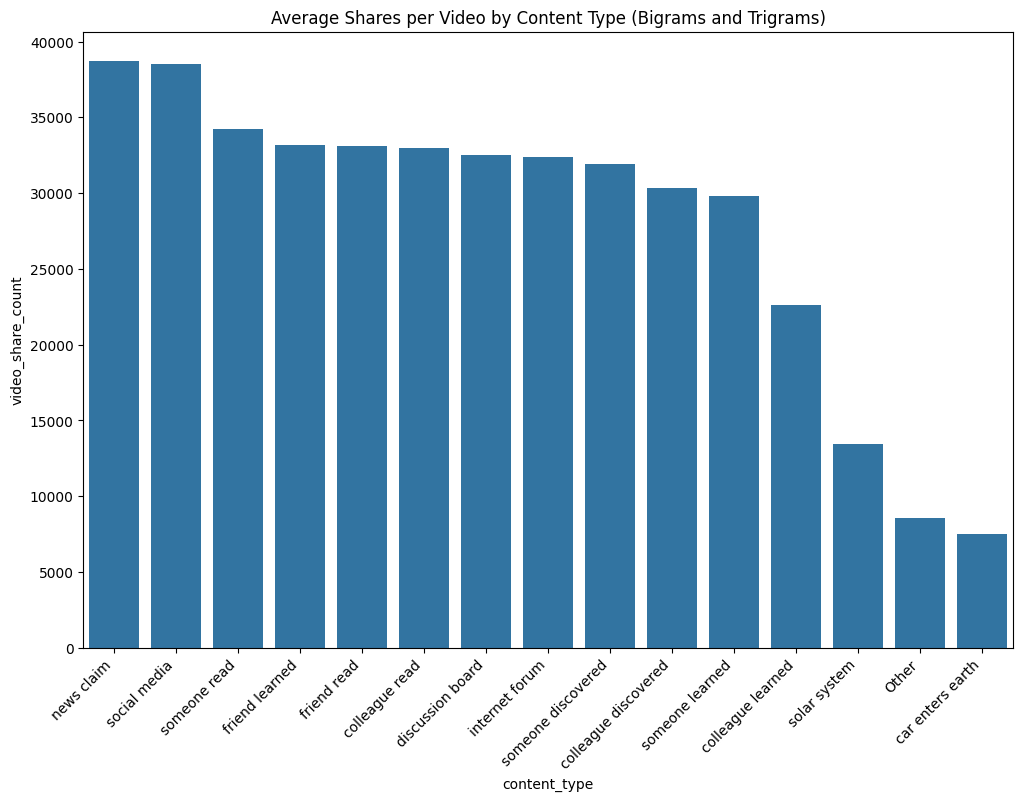

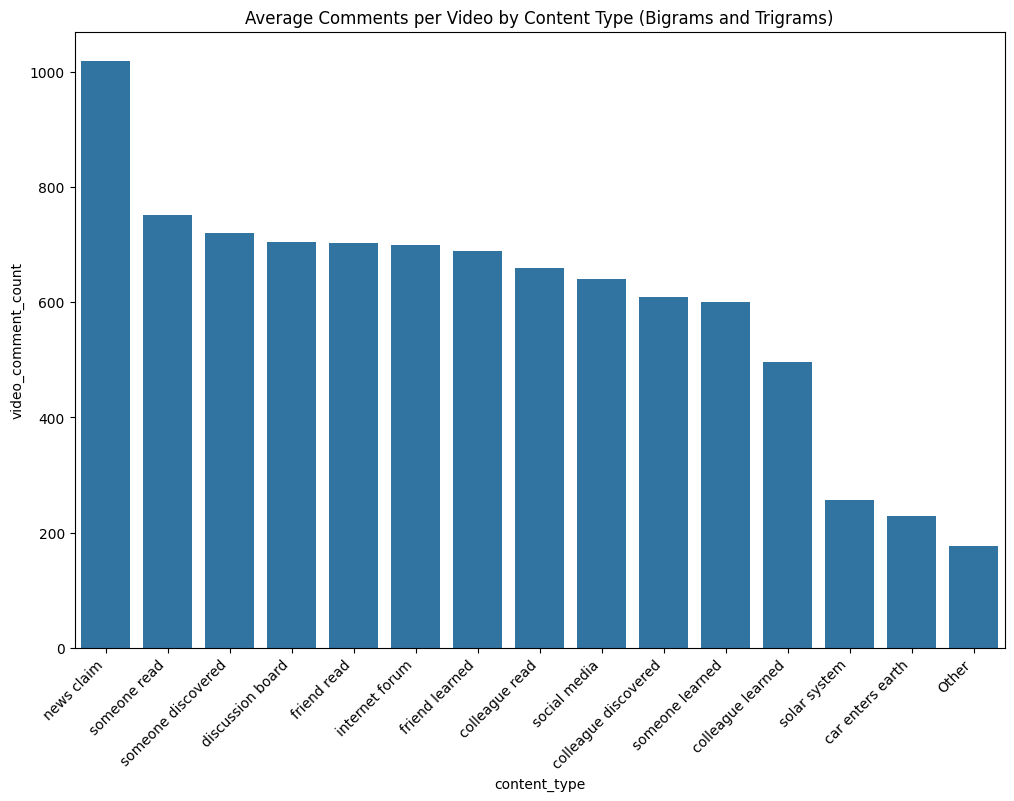

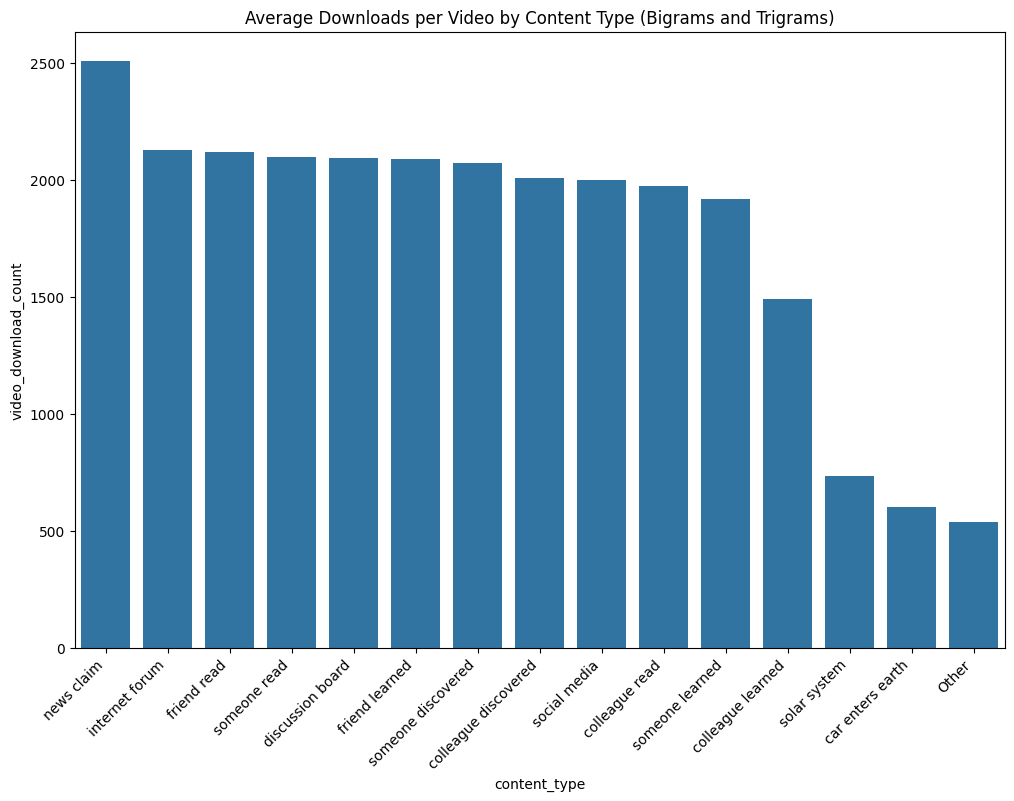

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by views_per_sec
sorted_engagement = engagement_summary.sort_values(by='views_per_sec', ascending=False)

# Visualize average views per second by content type (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x='content_type', y='views_per_sec', data=sorted_engagement)
plt.title('Average Views per Second by Content Type (Bigrams and Trigrams)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort by video_like_count
sorted_engagement = engagement_summary.sort_values(by='video_like_count', ascending=False)

# Visualize average likes per video by content type (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x='content_type', y='video_like_count', data=sorted_engagement)
plt.title('Average Likes per Video by Content Type (Bigrams and Trigrams)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort by video_share_count
sorted_engagement = engagement_summary.sort_values(by='video_share_count', ascending=False)

# Visualize average shares per video by content type (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x='content_type', y='video_share_count', data=sorted_engagement)
plt.title('Average Shares per Video by Content Type (Bigrams and Trigrams)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort by video_comment_count
sorted_engagement = engagement_summary.sort_values(by='video_comment_count', ascending=False)

# Visualize average comments per video by content type (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x='content_type', y='video_comment_count', data=sorted_engagement)
plt.title('Average Comments per Video by Content Type (Bigrams and Trigrams)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort by video_download_count
sorted_engagement = engagement_summary.sort_values(by='video_download_count', ascending=False)

# Visualize average downloads per video by content type (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x='content_type', y='video_download_count', data=sorted_engagement)
plt.title('Average Downloads per Video by Content Type (Bigrams and Trigrams)')
plt.xticks(rotation=45, ha='right')
plt.show()

## 3.4 Key Findings:

1.	High-Performing Content Types:
- "News Claim", “Friend learned” and “Colleague discovered” were among the top-performing content types, showing the highest average views per second (~24,567 and ~23,825 respectively). These content types also exhibited high engagement across other metrics, including likes, shares, and comments per second.
- Videos in these categories tend to be more engaging, possibly due to the specific context or the way these phrases resonate with viewers.
2.	Comparison with “Other”:
- The “Other” category, which contains videos that did not match any of the top phrases, had significantly lower average views per second (~6,131) and other engagement metrics. This indicates that videos aligned with popular phrases tend to perform much better in terms of engagement.
3.	Content Specific Trends:
- “Social media” and “Internet forum” content types also showed strong performance, with average views per second of around 23,494 and 24,141, respectively. These categories might indicate content that is trendy or widely discussed, leading to higher engagement.
- “Solar system” content, while less common, showed moderate engagement metrics, with an average of ~8,294 views per second. This suggests a niche but interested audience.

### Visual Summary:

- Views per Second: Content types with specific phrases like “friend learned” or “colleague discovered” significantly outperform others.
- Engagement Consistency: Across different content types, there is a consistency where popular phrases correlate with higher engagement metrics.

### Conclusions:

- Content that includes specific, commonly used phrases tends to perform better across all engagement metrics compared to generic or non-specific content.
- These findings suggest that aligning video content with popular trends or keywords can significantly enhance viewer engagement on TikTok.